In [20]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
# Importing the training set
training_set = pd.read_csv('/Users/muthiyagarajan/Downloads/ebay.csv')
training_set = training_set.iloc[:,1:2].values

In [25]:
training_set = pd.read_csv('/Users/muthiyagarajan/Downloads/ebay.csv')

In [26]:
training_set.shape

(229, 6)

In [28]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [29]:
# Getting the inputs and the ouputs
X_train = training_set[0:228]
y_train = training_set[1:229]

In [30]:
# Reshaping
X_train = np.reshape(X_train, (228, 1, 1))

In [31]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [32]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

In [89]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 200, epochs = 1000)

Epoch 1/1000
228/228 [==============================] - 0s - loss: 0.0015     
Epoch 2/1000
228/228 [==============================] - 0s - loss: 0.0015     
Epoch 3/1000
228/228 [==============================] - 0s - loss: 0.0015     
Epoch 4/1000
228/228 [==============================] - 0s - loss: 0.0015     
Epoch 5/1000
228/228 [==============================] - 0s - loss: 0.0015     
Epoch 6/1000
228/228 [==============================] - 0s - loss: 0.0015     
Epoch 7/1000
228/228 [==============================] - 0s - loss: 0.0015     

In [90]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
test_set = pd.read_csv('/Users/muthiyagarajan/Documents/ebay_test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [91]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (21, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

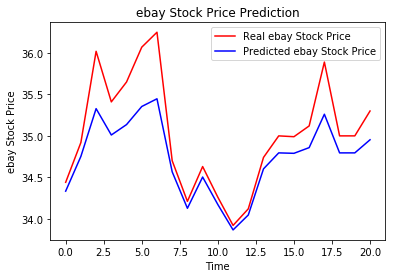

In [92]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real ebay Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ebay Stock Price')
plt.title('ebay Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ebay Stock Price')
plt.legend()
plt.show()

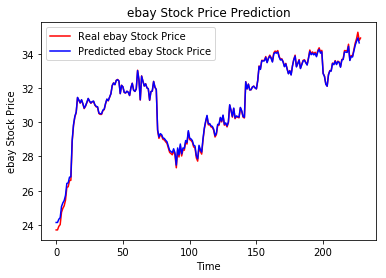

In [93]:
# Getting the real stock price of 2012 - 2016
real_stock_price_train = pd.read_csv('/Users/muthiyagarajan/Downloads/ebay.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real ebay Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted ebay Stock Price')
plt.title('ebay Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ebay Stock Price')
plt.legend()
plt.show()

# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [94]:
rmse

0.37317874648236016